IMPORT THE DEPENDENCIES  

In [64]:
import pandas as pd
import pandas_profiling as pf
import numpy as np 
from sklearn import linear_model
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA, TruncatedSVD
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.grid_search import GridSearchCV
from sklearn.naive_bayes import BernoulliNB
from sklearn.ensemble import VotingClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.utils import resample
import xgboost as xg
import seaborn as sns
import matplotlib.pyplot as plt
from mlens.visualization import corrmat
import scipy
from scipy.stats import spearmanr, chi2_contingency
%matplotlib inline

In [2]:
df = pd.read_table('DScasestudy1_2.txt')

# EDA

Here we will take a overall look at the data. 

In [3]:
df

,response,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V16553,V16554,V16555,V16556,V16557,V16558,V16559,V16560,V16561,V16562
0,1,0,0,0,0,0,1,0,0,0,...,1,0,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,1
2,1,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,1
3,1,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,1,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,1
6,1,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,1
7,1,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8,1,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,1
9,1,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,1


It seems like the data is not shuffled all the 1's and 0's are not mixed together we'll have to make sure to shuffle the data before testing. 

- Let's see which columns are not giving us any information because they are all the same. First the ones that have a 1/True value
- and let's see which columns give us all zero's essentially a columns with no information. 

In [4]:
df = df.loc[:,df.sum()!= 530]

In [5]:
df = df.loc[:,df.sum() > 0]

In [6]:
df.shape

(530, 10894)

In [7]:
df.head()

,response,V1,V2,V3,V5,V7,V8,V11,V13,V17,...,V16549,V16550,V16551,V16552,V16553,V16556,V16557,V16558,V16560,V16562
0,1,0,0,0,0,0,0,0,0,0,...,1,0,0,0,1,0,0,0,0,0
1,1,0,0,0,0,0,0,0,1,1,...,0,0,0,0,0,0,0,0,0,1
2,1,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,1
3,1,0,0,0,0,0,0,0,1,1,...,1,0,0,0,0,0,0,0,0,0
4,1,0,0,0,0,0,0,0,0,1,...,1,0,0,0,0,0,0,0,0,0


In [8]:
df.describe()

,response,V1,V2,V3,V5,V7,V8,V11,V13,V17,...,V16549,V16550,V16551,V16552,V16553,V16556,V16557,V16558,V16560,V16562
count,530.000000,530.000000,530.000000,530.000000,530.000000,530.000000,530.000000,530.000000,530.000000,530.000000,...,530.000000,530.000000,530.000000,530.000000,530.000000,530.000000,530.000000,530.000000,530.000000,530.000000
mean,0.232075,0.009434,0.009434,0.001887,0.020755,0.001887,0.030189,0.009434,0.130189,0.416981,...,0.666038,0.013208,0.003774,0.022642,0.158491,0.001887,0.020755,0.013208,0.003774,0.447170
std,0.422556,0.096761,0.096761,0.043437,0.142697,0.043437,0.171268,0.096761,0.336829,0.493526,...,0.472072,0.114270,0.061371,0.148898,0.365545,0.043437,0.142697,0.114270,0.061371,0.497671
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,...,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


High Dimensionality binary data. 

Extremly sparse data set let's see if theres any missing values 

& Check for duplicates

In [9]:
sum(list(df.isnull().sum()))

0

In [10]:
df.duplicated().sum()

0

Lets sum up the rows and then seperate them by response to get a comparison between the two classes. 

In [11]:
df['Total'] = df.sum(axis=1)

In [12]:
df_class_0 = df[df.response == 0]

In [13]:
df_class_0.Total.describe()

count     407.000000
mean     1059.636364
std       243.933126
min       488.000000
25%       873.500000
50%      1055.000000
75%      1202.000000
max      1841.000000
Name: Total, dtype: float64

In [14]:
df_class_1 = df[df.response == 1]

In [15]:
df_class_1.Total.describe()

count     123.000000
mean     1141.853659
std       199.783887
min       694.000000
25%      1004.000000
50%      1143.000000
75%      1257.000000
max      1908.000000
Name: Total, dtype: float64

The dataset has a higher min,max and mean for our minority class. It let's us know that more columns are participating when we get a 1. We also have a lower std which could mean our data is more concentrated/predictable around the 1 class. Although it could just be the result of a smaller sample size. 

Let's look at the ratio of the response target labels

In [16]:
df['response'].value_counts()

0    407
1    123
Name: response, dtype: int64

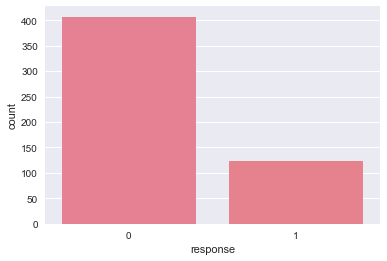

In [17]:
sns.countplot(x='response',data=df);

A 3.3:1 ratio we'll need to pick scoring metrics like precision, recall, F1; accuracy wont work here. Too unevenly distributed.

In [18]:
X = df.drop(['response','Total'],axis=1)

y = df['response']

print X.shape
print y.shape

(530, 10893)
(530,)


Here we'll split the data into two types of train and test data. 
One will be without any dimensionality reduction and the other we will use a dimensionality reducer. We'll run the same models on both and compare the outcomes. 

We'll use TruncatedSVD to reduce the dimensionality as it's optimized for sparse datasets. There's no need to standardize the data as its already all on the same binary scale. First we will use to components to look at the dataset and see the distribution. 

In [19]:
svd = TruncatedSVD(n_components=2)
x_svd = svd.fit(X).transform(X)

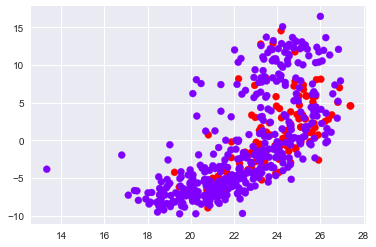

In [20]:
plt.scatter(x_svd[:,0],x_svd[:,1],c=y,cmap='rainbow')

A look at the distribution of the data between the two components. There's a large amount of overlap on this 2D scale. 

Change of n_components to optimize scores. 

In [21]:
svd = TruncatedSVD(n_components=64)
x_svd = svd.fit(X).transform(X)

Break our data set up for training and testing. Set aside 20% for testing and shuffle the data. 

In [22]:
x_train,x_test, y_train, y_test = train_test_split(X,y,test_size=0.2, shuffle= True,random_state=7)

x_train_SVD,x_test_SVD, y_train_SVD, y_test_SVD = train_test_split(x_svd,y,test_size=0.2,shuffle=True,random_state=7)


Create 2 empty dictionaries to compare model predictions later. 


In [23]:
SVD_scores = {}
NORM_scores  = {}

# LOGISTIC REGRESSION

- Normal

In [24]:
lrg = linear_model.LogisticRegression()
lrg.fit(x_train,y_train)
y_pred = lrg.predict(x_test)


print confusion_matrix(y_test,y_pred)
print '\n'
print classification_report(y_test,y_pred)

NORM_scores['lrg'] = y_pred

[[83  2]
 [11 10]]


             precision    recall  f1-score   support

          0       0.88      0.98      0.93        85
          1       0.83      0.48      0.61        21

avg / total       0.87      0.88      0.86       106



- SVD

In [25]:
lrg = linear_model.LogisticRegression()
lrg.fit(x_train_SVD,y_train_SVD)
y_pred = lrg.predict(x_test_SVD)


print confusion_matrix(y_test_SVD,y_pred)
print '\n'
print classification_report(y_test_SVD,y_pred)

SVD_scores['lrg'] = y_pred

[[77  8]
 [10 11]]


             precision    recall  f1-score   support

          0       0.89      0.91      0.90        85
          1       0.58      0.52      0.55        21

avg / total       0.82      0.83      0.83       106



Good results only problem is that the dataset fails one of the logistic regression assumptions that theres a 50:1 ratio of observations to features. The massive difference could lead to unreliable predictions on future datasets. 

Next we'll test our dataset on a few different tree ensemble methods 

# XGBOOST

- NORMAL

In [26]:
xgb = xg.XGBClassifier()
xgb.fit(x_train,y_train)
y_pred = xgb.predict(x_test)
print confusion_matrix(y_test,y_pred)
print '\n'
print classification_report(y_test,y_pred)

NORM_scores['xgb'] = y_pred

[[84  1]
 [11 10]]


             precision    recall  f1-score   support

          0       0.88      0.99      0.93        85
          1       0.91      0.48      0.62        21

avg / total       0.89      0.89      0.87       106



- SVD

In [27]:
xgb = xg.XGBClassifier()
xgb.fit(x_train_SVD,y_train_SVD)
y_pred = xgb.predict(x_test_SVD)
print confusion_matrix(y_test_SVD,y_pred)
print '\n'
print classification_report(y_test_SVD,y_pred)

SVD_scores['xgb'] = y_pred

[[80  5]
 [14  7]]


             precision    recall  f1-score   support

          0       0.85      0.94      0.89        85
          1       0.58      0.33      0.42        21

avg / total       0.80      0.82      0.80       106



# RANDOM FOREST

- Normal

In [28]:
rfc = RandomForestClassifier(n_estimators=200,random_state=7)
rfc.fit(x_train,y_train)
rfc_pred = rfc.predict(x_test)
print confusion_matrix(y_test,y_pred)
print '\n'
print classification_report(y_test,y_pred)

NORM_scores['rfc'] = y_pred

[[80  5]
 [14  7]]


             precision    recall  f1-score   support

          0       0.85      0.94      0.89        85
          1       0.58      0.33      0.42        21

avg / total       0.80      0.82      0.80       106



- SVD

In [29]:
rfc = RandomForestClassifier(n_estimators=200,random_state=7)
rfc.fit(x_train_SVD,y_train_SVD)
rfc_pred = rfc.predict(x_test_SVD)
print confusion_matrix(y_test_SVD,y_pred)
print '\n'
print classification_report(y_test_SVD,y_pred)

SVD_scores['rfc'] = y_pred

[[80  5]
 [14  7]]


             precision    recall  f1-score   support

          0       0.85      0.94      0.89        85
          1       0.58      0.33      0.42        21

avg / total       0.80      0.82      0.80       106



# Gradient Boosting 

- NORMAL

In [30]:
gbc = GradientBoostingClassifier(random_state=7)
gbc.fit(x_train,y_train)
gbc_pred = gbc.predict(x_test)
print confusion_matrix(y_test, y_pred)
print '\n'
print classification_report(y_test, y_pred)

NORM_scores['gbc'] = y_pred

[[80  5]
 [14  7]]


             precision    recall  f1-score   support

          0       0.85      0.94      0.89        85
          1       0.58      0.33      0.42        21

avg / total       0.80      0.82      0.80       106



- SVD

In [31]:
gbc = GradientBoostingClassifier(random_state=7)
gbc.fit(x_train_SVD,y_train_SVD)
gbc_pred = gbc.predict(x_test_SVD)
print confusion_matrix(y_test_SVD,y_pred)
print '\n'
print classification_report(y_test_SVD,y_pred)

SVD_scores['gbc'] = y_pred

[[80  5]
 [14  7]]


             precision    recall  f1-score   support

          0       0.85      0.94      0.89        85
          1       0.58      0.33      0.42        21

avg / total       0.80      0.82      0.80       106



All three derived very similar scores. 

# Support Vector

-NORMAL

Next we'll use a Support vector machine along with a grid search to find the best seperation between the classes

In [32]:
model = SVC()
param_grid = {'C':[0.1,1,10,100,1000],'gamma':[1,0.1,.01,.001,0.0001]}
grid = GridSearchCV(model,param_grid,verbose=3)
grid.fit(x_train,y_train)

Fitting 3 folds for each of 25 candidates, totalling 75 fits
[CV] C=0.1, gamma=1 ..................................................
[CV] ......................... C=0.1, gamma=1, score=0.760563 -   1.4s
[CV] C=0.1, gamma=1 ..................................................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    1.5s remaining:    0.0s


[CV] ......................... C=0.1, gamma=1, score=0.758865 -   1.6s
[CV] C=0.1, gamma=1 ..................................................


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    3.1s remaining:    0.0s


[CV] ......................... C=0.1, gamma=1, score=0.758865 -   1.5s
[CV] C=0.1, gamma=0.1 ................................................
[CV] ....................... C=0.1, gamma=0.1, score=0.760563 -   1.5s
[CV] C=0.1, gamma=0.1 ................................................
[CV] ....................... C=0.1, gamma=0.1, score=0.758865 -   1.5s
[CV] C=0.1, gamma=0.1 ................................................
[CV] ....................... C=0.1, gamma=0.1, score=0.758865 -   1.7s
[CV] C=0.1, gamma=0.01 ...............................................
[CV] ...................... C=0.1, gamma=0.01, score=0.760563 -   1.6s
[CV] C=0.1, gamma=0.01 ...............................................
[CV] ...................... C=0.1, gamma=0.01, score=0.758865 -   1.6s
[CV] C=0.1, gamma=0.01 ...............................................
[CV] ...................... C=0.1, gamma=0.01, score=0.758865 -   1.6s
[CV] C=0.1, gamma=0.001 ..............................................
[CV] .

[Parallel(n_jobs=1)]: Done  75 out of  75 | elapsed:  1.9min finished


GridSearchCV(cv=None, error_score='raise',
       estimator=SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False),
       fit_params={}, iid=True, n_jobs=1,
       param_grid={'C': [0.1, 1, 10, 100, 1000], 'gamma': [1, 0.1, 0.01, 0.001, 0.0001]},
       pre_dispatch='2*n_jobs', refit=True, scoring=None, verbose=3)

In [33]:
print 'Best Params: ', grid.best_params_
print '\n'
print 'Best Estimator: ', grid.best_estimator_

Best Params:  {'C': 100, 'gamma': 0.0001}


Best Estimator:  SVC(C=100, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma=0.0001, kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)


In [34]:
grid_predictions = grid.predict(x_test)
print confusion_matrix(y_test, y_pred)
print '\n'
print classification_report(y_test, y_pred)

NORM_scores['svc'] = y_pred

[[80  5]
 [14  7]]


             precision    recall  f1-score   support

          0       0.85      0.94      0.89        85
          1       0.58      0.33      0.42        21

avg / total       0.80      0.82      0.80       106



-SVD

In [35]:
model = SVC()
param_grid = {'C':[0.1,1,10,100,1000],'gamma':[1,0.1,.01,.001,0.0001]}
grid = GridSearchCV(SVC(),param_grid,verbose=3)
grid.fit(x_train_SVD,y_train_SVD)

Fitting 3 folds for each of 25 candidates, totalling 75 fits
[CV] C=0.1, gamma=1 ..................................................
[CV] ......................... C=0.1, gamma=1, score=0.760563 -   0.0s
[CV] C=0.1, gamma=1 ..................................................
[CV] ......................... C=0.1, gamma=1, score=0.758865 -   0.0s
[CV] C=0.1, gamma=1 ..................................................
[CV] ......................... C=0.1, gamma=1, score=0.758865 -   0.0s
[CV] C=0.1, gamma=0.1 ................................................
[CV] ....................... C=0.1, gamma=0.1, score=0.760563 -   0.0s
[CV] C=0.1, gamma=0.1 ................................................
[CV] ....................... C=0.1, gamma=0.1, score=0.758865 -   0.0s
[CV] C=0.1, gamma=0.1 ................................................
[CV] ....................... C=0.1, gamma=0.1, score=0.758865 -   0.0s
[CV] C=0.1, gamma=0.01 ...............................................
[CV] ...........

[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s


[CV] .................... C=0.1, gamma=0.0001, score=0.758865 -   0.0s
[CV] C=0.1, gamma=0.0001 .............................................
[CV] .................... C=0.1, gamma=0.0001, score=0.758865 -   0.0s
[CV] C=1, gamma=1 ....................................................
[CV] ........................... C=1, gamma=1, score=0.760563 -   0.0s
[CV] C=1, gamma=1 ....................................................
[CV] ........................... C=1, gamma=1, score=0.758865 -   0.0s
[CV] C=1, gamma=1 ....................................................
[CV] ........................... C=1, gamma=1, score=0.758865 -   0.0s
[CV] C=1, gamma=0.1 ..................................................
[CV] ......................... C=1, gamma=0.1, score=0.760563 -   0.0s
[CV] C=1, gamma=0.1 ..................................................
[CV] ......................... C=1, gamma=0.1, score=0.758865 -   0.0s
[CV] C=1, gamma=0.1 ..................................................
[CV] .

[Parallel(n_jobs=1)]: Done  75 out of  75 | elapsed:    1.2s finished


GridSearchCV(cv=None, error_score='raise',
       estimator=SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False),
       fit_params={}, iid=True, n_jobs=1,
       param_grid={'C': [0.1, 1, 10, 100, 1000], 'gamma': [1, 0.1, 0.01, 0.001, 0.0001]},
       pre_dispatch='2*n_jobs', refit=True, scoring=None, verbose=3)

In [36]:
print 'Best Params: ', grid.best_params_
print '\n'
print 'Best Estimator: ', grid.best_estimator_

Best Params:  {'C': 10, 'gamma': 0.001}


Best Estimator:  SVC(C=10, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma=0.001, kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)


In [37]:
grid_predictions = grid.predict(x_test_SVD)
print confusion_matrix(y_test, y_pred)
print '\n'
print classification_report(y_test, y_pred)

SVD_scores['svc'] = y_pred

[[80  5]
 [14  7]]


             precision    recall  f1-score   support

          0       0.85      0.94      0.89        85
          1       0.58      0.33      0.42        21

avg / total       0.80      0.82      0.80       106



# KNN

-NORMAL

In [38]:
knn = KNeighborsClassifier(n_neighbors=2)
knn.fit(x_train, y_train)
knn_pred = knn.predict(x_test)
print confusion_matrix(y_test,y_pred)
print '\n'
print classification_report(y_test,y_pred)

NORM_scores['knn'] = y_pred

[[80  5]
 [14  7]]


             precision    recall  f1-score   support

          0       0.85      0.94      0.89        85
          1       0.58      0.33      0.42        21

avg / total       0.80      0.82      0.80       106



-SVD

In [39]:
knn = KNeighborsClassifier(n_neighbors=2)
knn.fit(x_train_SVD, y_train_SVD)
knn_pred = knn.predict(x_test_SVD)
print confusion_matrix(y_test_SVD,y_pred)
print '\n'
print classification_report(y_test_SVD,y_pred)

SVD_scores['knn'] = y_pred

[[80  5]
 [14  7]]


             precision    recall  f1-score   support

          0       0.85      0.94      0.89        85
          1       0.58      0.33      0.42        21

avg / total       0.80      0.82      0.80       106



# NAIVE BAYES

-NORMAL

In [40]:
bnb = BernoulliNB()
bnb.fit(x_train,y_train)
y_pred = bnb.predict(x_test)

print confusion_matrix(y_test,y_pred)
print '\n'
print classification_report(y_test,y_pred)

NORM_scores['nb'] = y_pred

[[72 13]
 [10 11]]


             precision    recall  f1-score   support

          0       0.88      0.85      0.86        85
          1       0.46      0.52      0.49        21

avg / total       0.79      0.78      0.79       106



-SVD

In [41]:
bnb = BernoulliNB()
bnb.fit(x_train_SVD,y_train_SVD)
y_pred = bnb.predict(x_test_SVD)

print 'Confusion Matrix: ','\n',confusion_matrix(y_test_SVD,y_pred)
print '\n'
print classification_report(y_test_SVD,y_pred)

SVD_scores['nb'] = y_pred

Confusion Matrix:  
[[81  4]
 [12  9]]


             precision    recall  f1-score   support

          0       0.87      0.95      0.91        85
          1       0.69      0.43      0.53        21

avg / total       0.84      0.85      0.83       106



# Neural Net

-NORM

In [42]:
mlp = MLPClassifier(max_iter=400)
mlp.fit(x_train,y_train)
y_pred = mlp.predict(x_test)

print confusion_matrix(y_test,y_pred)
print '\n'
print classification_report(y_test,y_pred)

NORM_scores['mlp'] = y_pred

[[83  2]
 [12  9]]


             precision    recall  f1-score   support

          0       0.87      0.98      0.92        85
          1       0.82      0.43      0.56        21

avg / total       0.86      0.87      0.85       106



-SVD

In [43]:
mlp = MLPClassifier()
mlp.fit(x_train_SVD,y_train_SVD)
y_pred = mlp.predict(x_test_SVD)

print confusion_matrix(y_test_SVD,y_pred)
print '\n'
print classification_report(y_test_SVD,y_pred)

SVD_scores['mlp'] = y_pred

[[76  9]
 [12  9]]


             precision    recall  f1-score   support

          0       0.86      0.89      0.88        85
          1       0.50      0.43      0.46        21

avg / total       0.79      0.80      0.80       106



//anaconda/lib/python2.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


# LOOK AT A CORRELATION OF THE MODEL ERRORS

-NORMAL

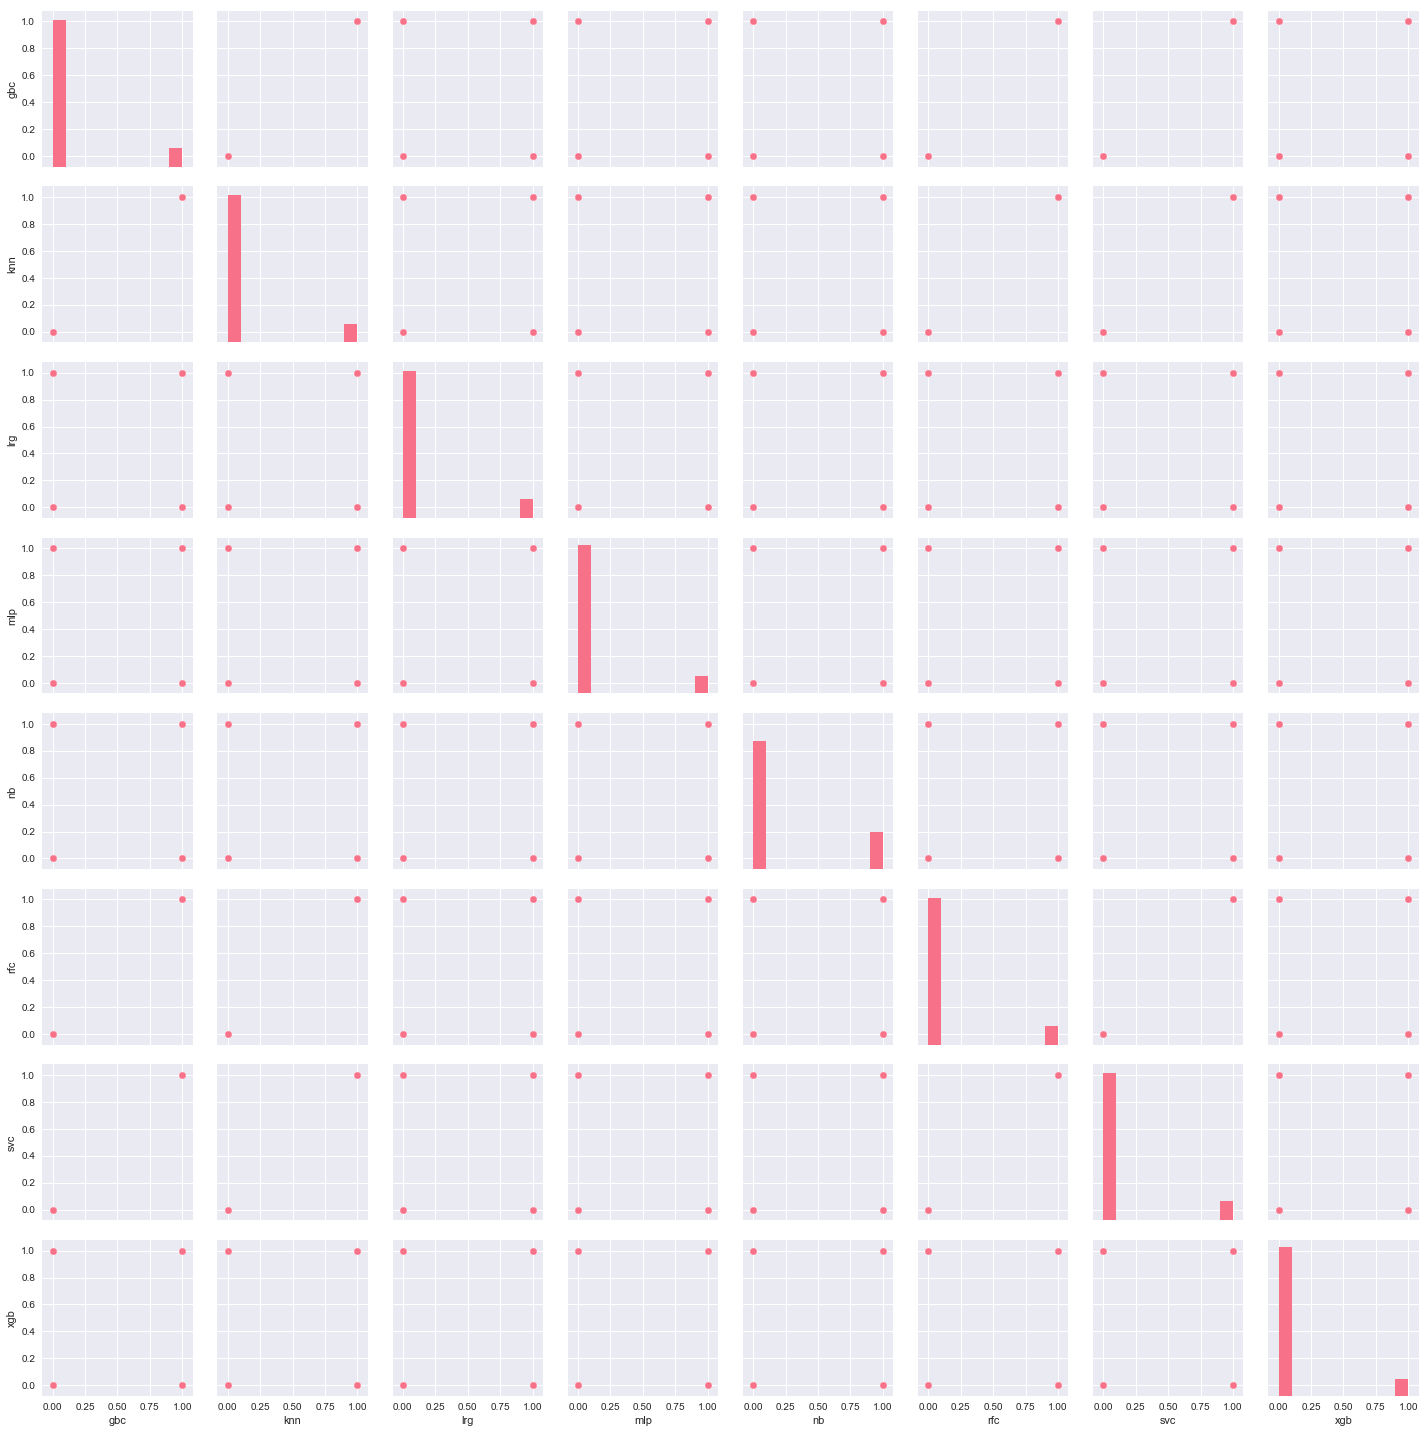

In [58]:
sns.pairplot(DF_NORM)

In [60]:
spearmanr_coefficient, p_value = spearmanr(DF_NORM['xgb'],DF_NORM['gbc'])
print 'SPearman Rank Correlation Coefficient %0.3f' % (spearmanr_coefficient)    

SPearman Rank Correlation Coefficient 0.464


In [61]:
spearmanr_coefficient, p_value = spearmanr(DF_NORM['xgb'],DF_NORM['knn'])
print 'SPearman Rank Correlation Coefficient %0.3f' % (spearmanr_coefficient)

SPearman Rank Correlation Coefficient 0.464


In [62]:
spearmanr_coefficient, p_value = spearmanr(DF_NORM['xgb'],DF_NORM['lrg'])
print 'SPearman Rank Correlation Coefficient %0.3f' % (spearmanr_coefficient)

SPearman Rank Correlation Coefficient 0.659


In [63]:
spearmanr_coefficient, p_value = spearmanr(DF_NORM['xgb'],DF_NORM['mlp'])
print 'SPearman Rank Correlation Coefficient %0.3f' % (spearmanr_coefficient)

SPearman Rank Correlation Coefficient 0.696


A p_value of < 0.05 let's us know that the variables are correlated.

In [66]:
table = pd.crosstab(DF_NORM['xgb'],DF_NORM['knn'])
chi2, p, dof, expected = chi2_contingency(table.values)

print 'chi-square Statistic %0.3f p_value %0.3f' %(chi2, p)

chi-square Statistic 18.291 p_value 0.000


In [67]:
table = pd.crosstab(DF_NORM['xgb'],DF_NORM['lrg'])
chi2, p, dof, expected = chi2_contingency(table.values)

print 'chi-square Statistic %0.3f p_value %0.3f' %(chi2, p)

chi-square Statistic 39.528 p_value 0.000


In [68]:
table = pd.crosstab(DF_NORM['xgb'],DF_NORM['mlp'])
chi2, p, dof, expected = chi2_contingency(table.values)

print 'chi-square Statistic %0.3f p_value %0.3f' %(chi2, p)

chi-square Statistic 44.095 p_value 0.000


In [69]:
table = pd.crosstab(DF_NORM['svc'],DF_NORM['gbc'])
chi2, p, dof, expected = chi2_contingency(table.values)

print 'chi-square Statistic %0.3f p_value %0.3f' %(chi2, p)

chi-square Statistic 96.273 p_value 0.000


The above just confirmed the corr matrix below. Just running some test to see that it's working

In [44]:
DF_NORM = pd.DataFrame(NORM_scores)
DF_NORM.head()

,gbc,knn,lrg,mlp,nb,rfc,svc,xgb
0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0
4,0,0,0,0,1,0,0,1


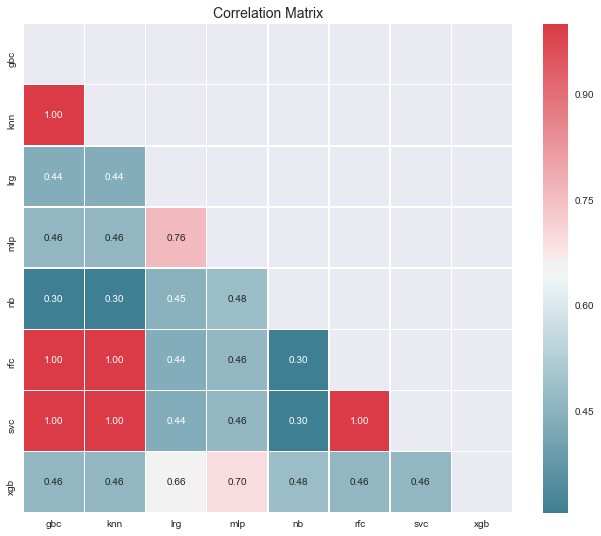

In [45]:
corrmat(DF_NORM.corr(), inflate=False)
plt.show()

-SVD

In [46]:
DF_SVD = pd.DataFrame(SVD_scores)
DF_SVD.head()

,gbc,knn,lrg,mlp,nb,rfc,svc,xgb
0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0


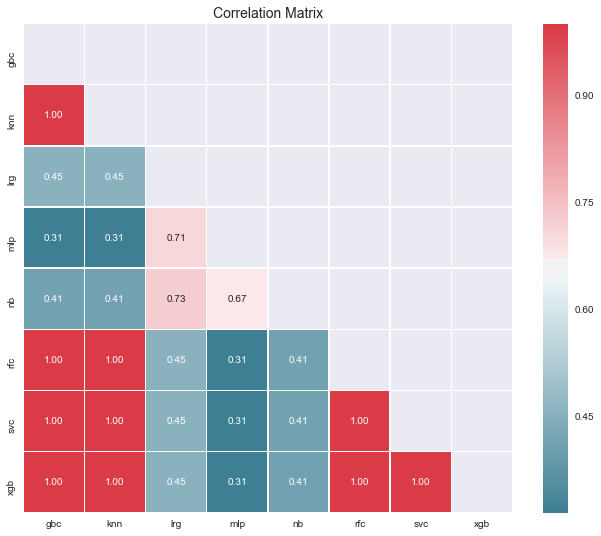

In [47]:
corrmat(DF_SVD.corr(), inflate=False)
plt.show()

The two heatmaps show us the correlation between the models. Not surprisingly the Tree midels are all tightly correlated. When we compose our ensemble model we'll only use one of the 3. The rest of the models seem to be misclassifying on different parts of the dataset.  

# ENSEMBLE WITH BEST MODELS

Sometimes an ensemble model can generate great results by taking advantage of the strengths of each model. The class gets chosen by taking a majority vote. One vote per model. 

In [48]:
lrg = linear_model.LogisticRegression()
bnb = BernoulliNB()
svc = SVC(C=100,gamma=.0001)
gbc = GradientBoostingClassifier(random_state=7)
rfc = RandomForestClassifier(n_estimators=200,random_state=7)
xgb = xg.XGBClassifier()
mlp = MLPClassifier(max_iter=1000)
knn = KNeighborsClassifier(n_neighbors=2)

In [49]:
NORM_evc = VotingClassifier(estimators=[('lrg',lrg),('bnb',bnb),('xgb',xgb),('mlp',mlp)], voting='hard')
NORM_evc.fit(x_train,y_train)
y_pred = NORM_evc.predict(x_test)

print confusion_matrix(y_test,y_pred)
print '\n'
print classification_report(y_test,y_pred)

[[84  1]
 [12  9]]


             precision    recall  f1-score   support

          0       0.88      0.99      0.93        85
          1       0.90      0.43      0.58        21

avg / total       0.88      0.88      0.86       106



-SVD ENSEMBLE

In [50]:
SVD_evc = VotingClassifier(estimators=[('lrg',lrg),('bnb',bnb),('svc',svc),('mlp',mlp)], voting='hard')
SVD_evc.fit(x_train_SVD,y_train_SVD)
y_pred = SVD_evc.predict(x_test_SVD)

print confusion_matrix(y_test_SVD,y_pred)
print '\n'
print classification_report(y_test_SVD,y_pred)

[[81  4]
 [12  9]]


             precision    recall  f1-score   support

          0       0.87      0.95      0.91        85
          1       0.69      0.43      0.53        21

avg / total       0.84      0.85      0.83       106



One last thing we'll try is upsampling the data from the minority class to get a larger representation in the dataset. First we'll split the data between classes

In [51]:
df_majority = df[df.response==0]
df_minority = df[df.response==1]

Now we'll sample with replacement from the minority class to just about double our representation. And join our larger 1/True class back with the 0/False class

In [52]:
df_minority_upsampled = resample(df_minority, 
                                 replace=True,     
                                 n_samples=200,    
                                 random_state=123) 

In [53]:
df_upsampled = pd.concat([df_majority, df_minority_upsampled])

In [54]:
df_upsampled.response.value_counts()

0    407
1    200
Name: response, dtype: int64

Now we will run the same NORM ensemble as above on the new data set.


In [55]:
X = df_upsampled.drop(['response','Total'],axis=1)
y = df_upsampled['response']

print X.shape
print y.shape

(607, 10893)
(607,)


In [56]:
x_train,x_test, y_train, y_test = train_test_split(X,y,test_size=0.2,shuffle=True,random_state=7)

In [57]:
NORM_evc = VotingClassifier(estimators=[('lrg',lrg),('bnb',bnb),('xgb',xgb),('mlp',mlp)], voting='hard')
NORM_evc.fit(x_train,y_train)
y_pred = NORM_evc.predict(x_test)

print confusion_matrix(y_test,y_pred)
print '\n'
print classification_report(y_test,y_pred)

[[80  0]
 [ 7 35]]


             precision    recall  f1-score   support

          0       0.92      1.00      0.96        80
          1       1.00      0.83      0.91        42

avg / total       0.95      0.94      0.94       122



We received a very good score compared to our earlier score or really, compared to any score. The problem is that, with the bootstrapping, we are most definitely overfitting the dataset and it may not generalize well on new novel observations. A similar related technique we could use is adjusting the weights of some of the models to place more emphasis on getting the minority class correct.   

Ultimately, if we were dealing with a dataset where the goal was to catch as many of the minority class as possible i would aim for the highest recall score related to the 1 class. Improvements could be made by obtaining a greater number of observations. Speaking with someone that had significant domain knowledge would also help categorize the data. Their input would help with making decisions regarding feature engineering and extraction. Having more time i would also go back and look at the individual columns to see which contribute the most to the minority class. 